### Importing Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading dataset into pandas dataframe

In [2]:
df_org = pd.read_csv("/content/train.csv", index_col = 0)

In [3]:
# Making copy of dataframe in case we need to restore the original one.
df = df_org.copy()

### Univariate Analysis

#### **1. Understand Dataset:** Get a sense of the dataset structure, including the number of rows and columns.

In [4]:
# First five Entries of dataframe.
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# Last five Entries of dataset
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [6]:
#Checking Number of rows and columns in dataset
df.shape

(9800, 17)

- Our dataset contain 1276 rows and 141 columns

#### **2. Data Cleaning:** Handle missing values, if any, by either removing or imputing them based on the nature of the data.

In [7]:
#Checking if there are any null values in dataset
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
# Data Cleaning

# 1. Handling missing values
# Example: Dropping columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)


In [9]:
# 4. Handling duplicate rows
df = df.drop_duplicates()

In [10]:
# For categorical columns, we can fill null values with the mode (most frequent value) of the column
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df['Postal Code'] = df['Postal Code'].fillna(df[col].mode()[0])

In [11]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [12]:
print(df['Postal Code'].dtype)

object


In [13]:
df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce')

In [14]:
df["Postal Code"] = df["Postal Code"].round(0)

In [15]:
print(df.dtypes)

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [16]:
df["Postal Code"].fillna(0, inplace=True)

In [17]:
df["Postal Code"] = df["Postal Code"].astype('int64')

In [18]:
# Displaying the cleaned dataset
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
#Checking if still any null
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [20]:
df.shape

(9799, 17)

In [21]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

#### **3. Data Types:** Check the data types of each column. Ensure they are appropriate for the analysis.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9799 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9799 non-null   int64  
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(1), int64(1), object(15)
memory usage: 1.

In [23]:
# For numerical columns, we can fill null values with the mean or median of the column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


#### **4. Descriptive Statistics:** Calculate basic descriptive statistics such as mean, median, mode, minimum, maximum, and standard deviation for numeric columns.

In [24]:
# Setting the pandas option to display float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [25]:
df.describe()

,Postal Code,Sales
count,9799.00,9799.00
mean,55212.50,230.76
std,32078.09,626.68
min,0.00,0.44
25%,23223.00,17.25
50%,57701.00,54.48
75%,90008.00,210.57
max,99301.00,22638.48


#### **5. Histograms:** Create histograms to visualize the distribution of key numeric variables (e.g. sales, Postal code).


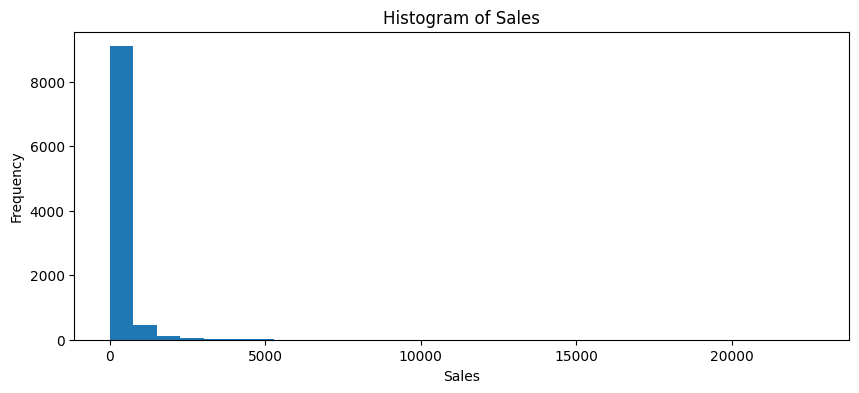

In [26]:
# Plotting histograms for the numerical columns
for column in ['Sales']:
    plt.figure(figsize=(10, 4))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

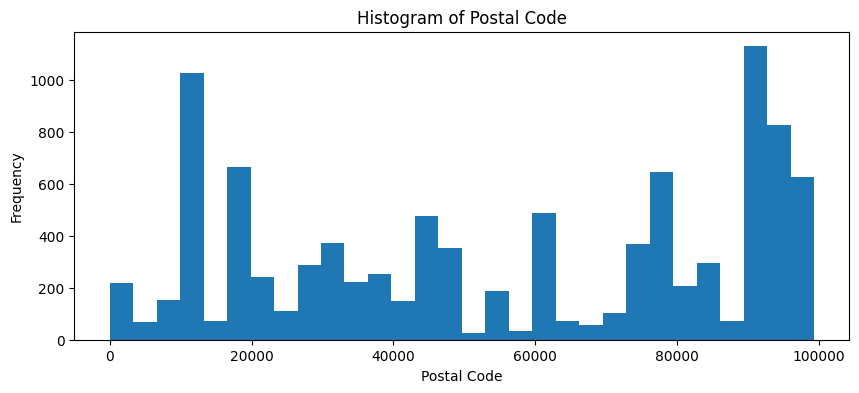

In [27]:
# Plotting histograms for the numerical columns
for column in ['Postal Code']:
    plt.figure(figsize=(10, 4))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

#### **9. Bar Charts:** Plot bar charts to represent distribution of Sales across categorical variables (e.g. Sales).

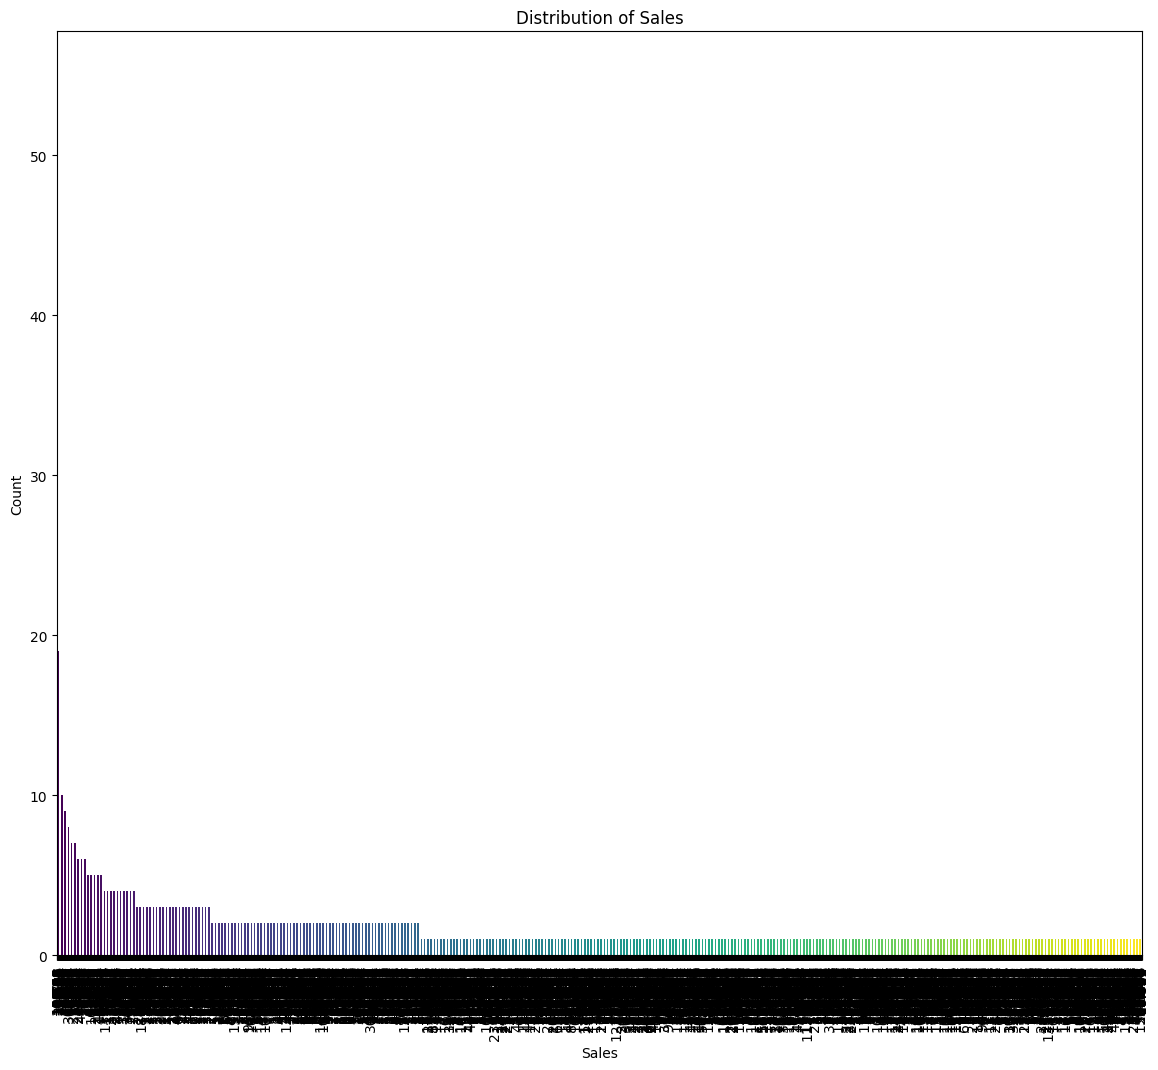

In [28]:
# Create a color map that matplotlib will use to color each bar differently
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Sales'].unique())))

# Plotting the bar chart for 'Sales'
make_counts = df['Sales'].value_counts()
plt.figure(figsize=(14, 12))
make_counts.plot(kind='bar', color=colors)  # Assign colors to each bar
plt.title('Distribution of Sales')
plt.ylabel('Count')
plt.xlabel('Sales')
plt.show()

6. Time Series Plots:

<ipython-input-29-6423547e668b>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


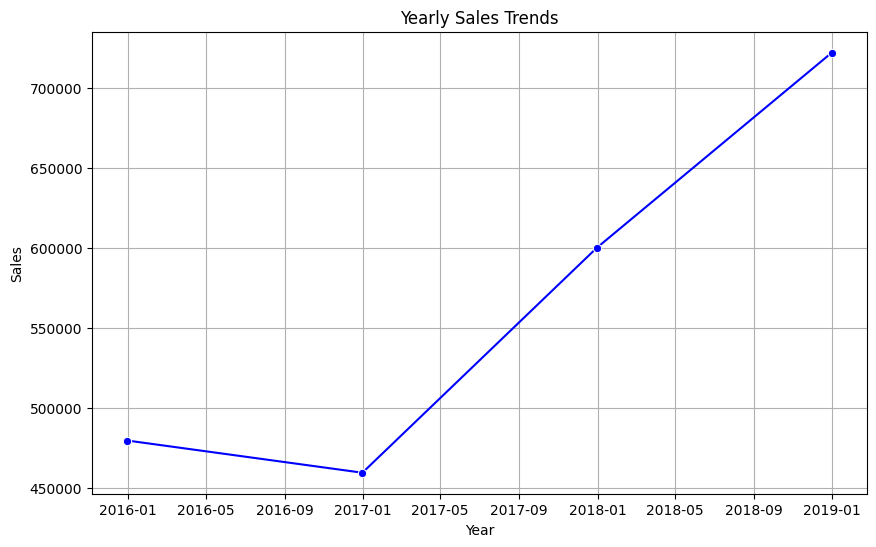

In [29]:
# Load your data into a pandas DataFrame
# Assuming your DataFrame is named df and it has a 'date' column and a 'sales' column

# Convert the 'date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set the 'date' column as the index of the DataFrame
df.set_index('Order Date', inplace=True)

# Resample the data to yearly frequency ('Y' for year)
sales_yearly = df['Sales'].resample('Y').sum()

# Plot the time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_yearly, marker='o', color='blue')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

7. Seasonal Decomposition:

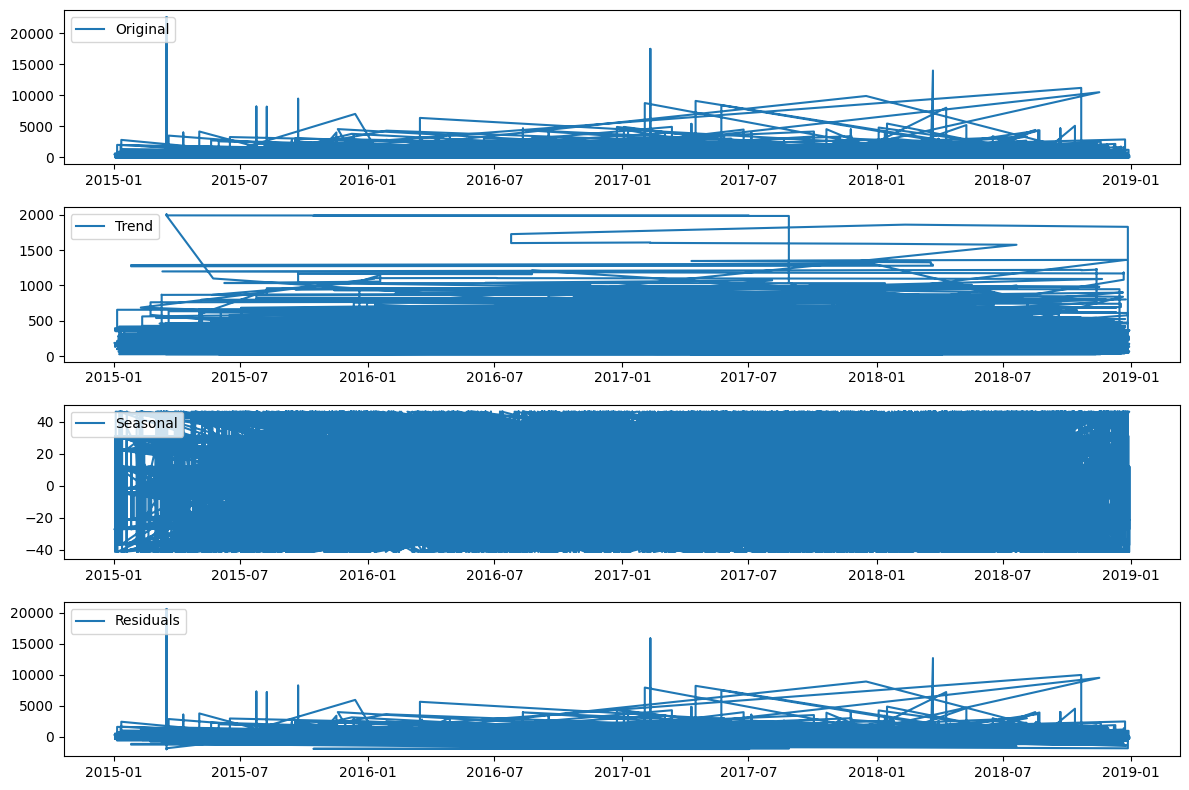

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)  # assuming a seasonal period of 12 months

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Sales'], label='Original')
plt.legend(loc='upper left')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Residuals component
plt.subplot(4, 1, 4)
plt.plot(df.index, decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


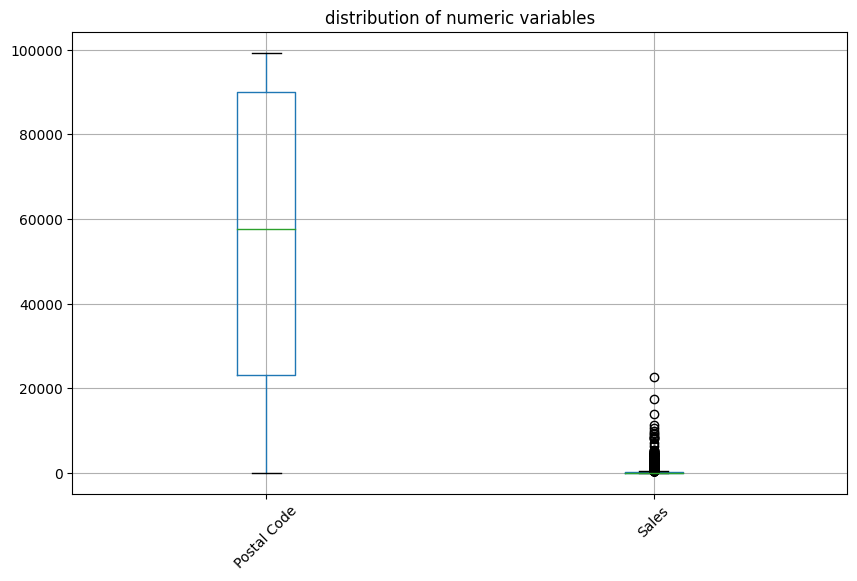

In [31]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('distribution of numeric variables')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

10 . Sales Variation Over Time

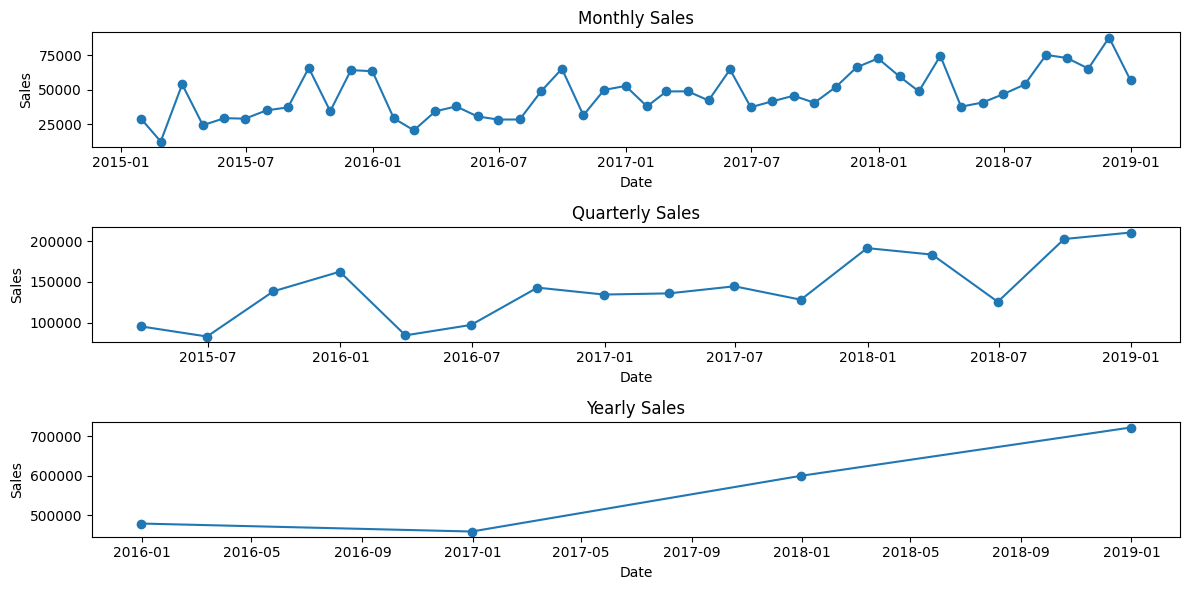

In [32]:
# Resample sales data by month
sales_monthly = df['Sales'].resample('M').sum()

# Resample sales data by quarter
sales_quarterly = df['Sales'].resample('Q').sum()

# Resample sales data by year
sales_yearly = df['Sales'].resample('Y').sum()

# Plot line charts
plt.figure(figsize=(12, 6))

# Monthly sales
plt.subplot(3, 1, 1)
plt.plot(sales_monthly.index, sales_monthly, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

# Quarterly sales
plt.subplot(3, 1, 2)
plt.plot(sales_quarterly.index, sales_quarterly, marker='o', linestyle='-')
plt.title('Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

# Yearly sales
plt.subplot(3, 1, 3)
plt.plot(sales_yearly.index, sales_yearly, marker='o', linestyle='-')
plt.title('Yearly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

# 2) Bivariate Analysis:


1. Correlation Analysis:

<ipython-input-33-4d9cce9cc355>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


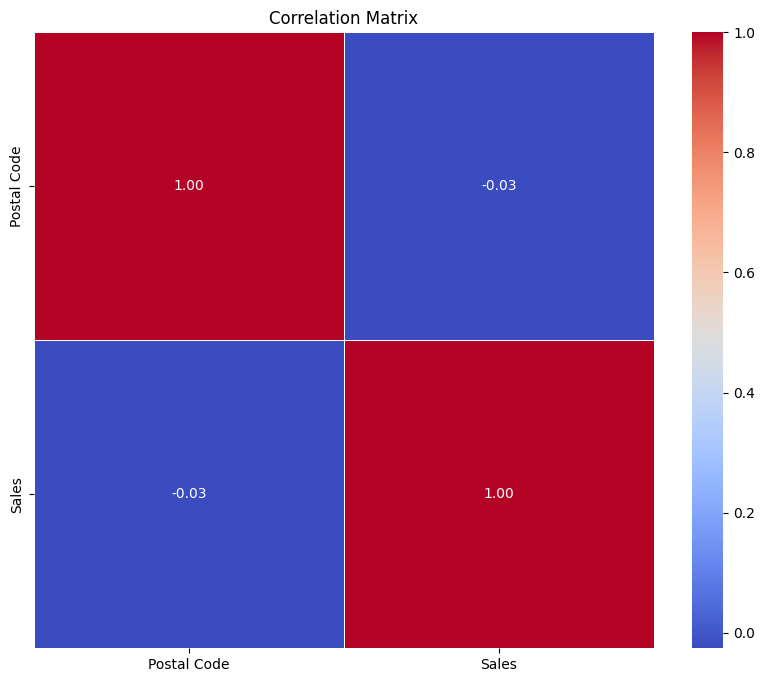

In [33]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

2. Scatter Plots:

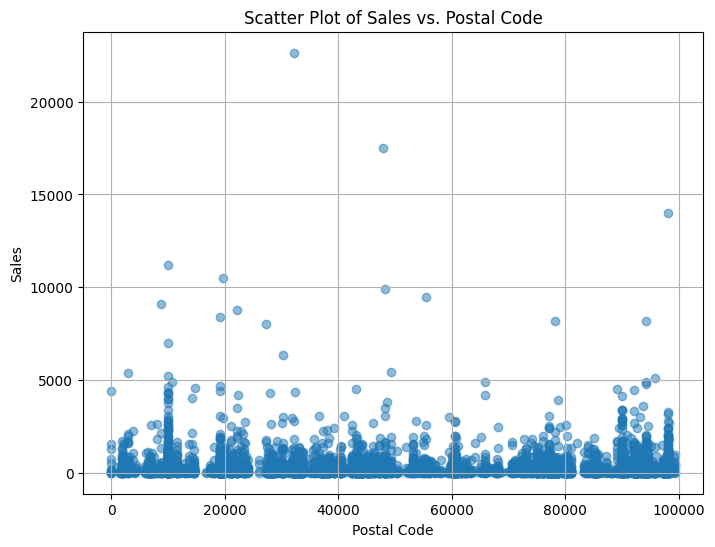

In [34]:
# Plot a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Postal Code'], df['Sales'], alpha=0.5)
plt.title('Scatter Plot of Sales vs. Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

3. Pair Plots:

<Figure size 1000x800 with 0 Axes>

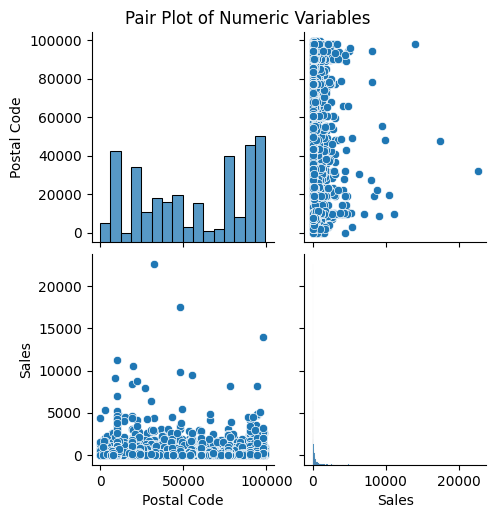

In [35]:
# Plot pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

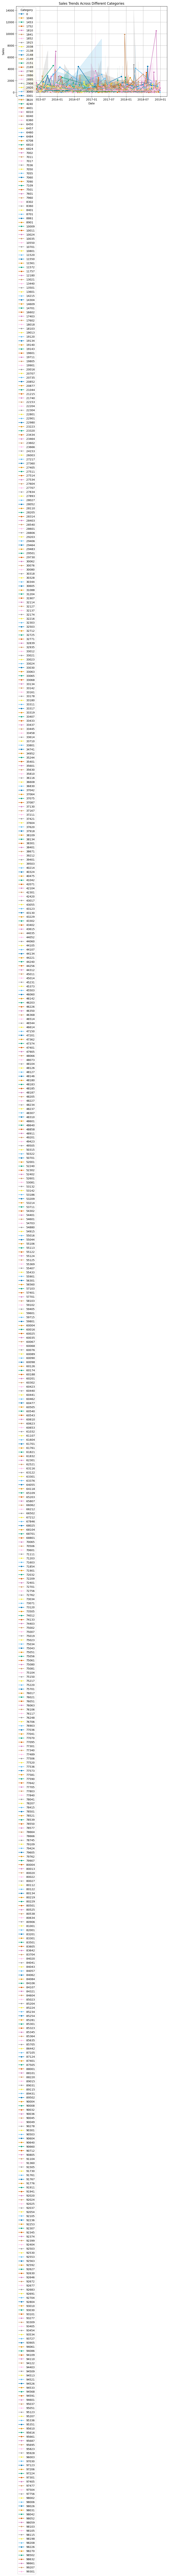

In [36]:
# Plot line charts for each category
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Sales', hue='Postal Code', marker='o', palette='colorblind')
plt.title('Sales Trends Across Different Categories')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [37]:
numerical_cols

Index(['Postal Code', 'Sales'], dtype='object')

<ipython-input-38-6d2144f6760c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


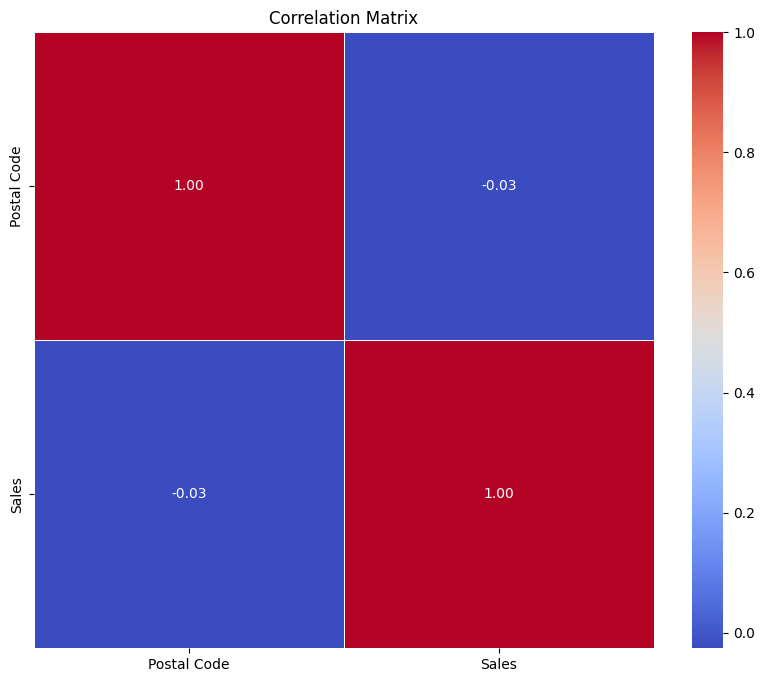

In [38]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

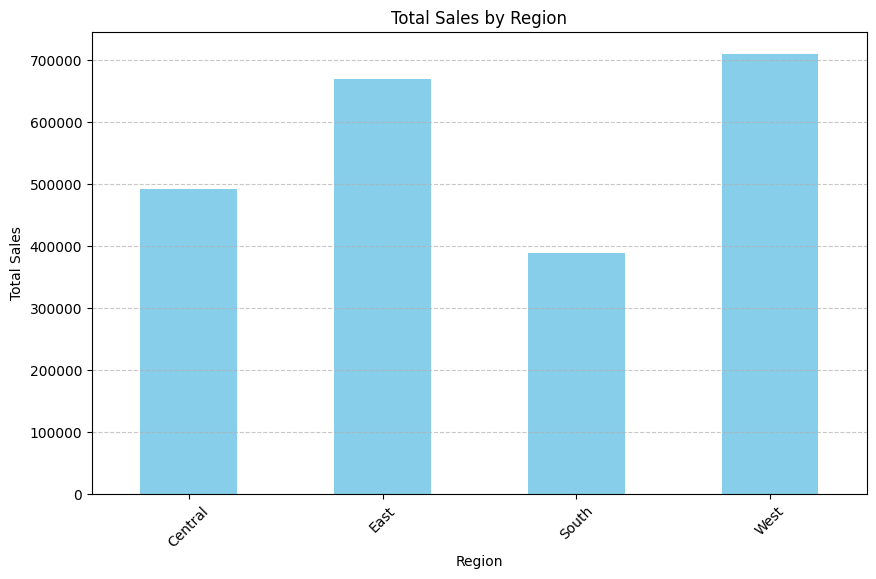

In [39]:
# Group the data by region and calculate total sales
sales_by_region = df.groupby('Region')['Sales'].sum()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

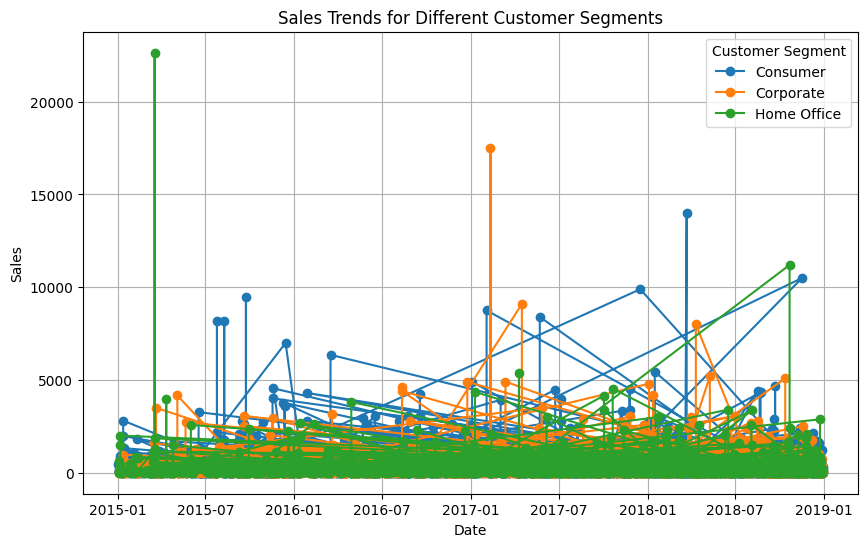

In [40]:
# Group the data by customer segment
grouped_df = df.groupby('Segment')

# Plot line charts for each customer segment
plt.figure(figsize=(10, 6))
for segment, data in grouped_df:
    plt.plot(data.index, data['Sales'], label=segment, marker='o', linestyle='-')

plt.title('Sales Trends for Different Customer Segments')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()

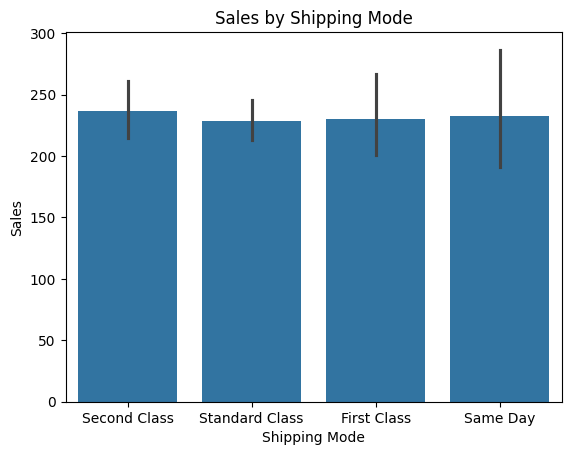

In [41]:
# Categorical plot - Bar plot
sns.barplot(x='Ship Mode', y='Sales', data=df)
plt.title('Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()


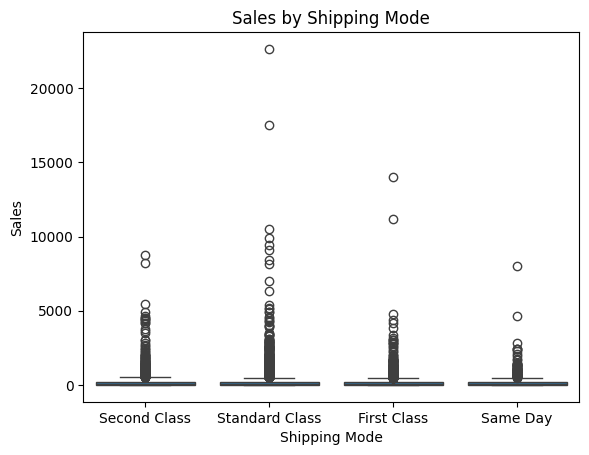

In [42]:
# Categorical plot - Box plot
sns.boxplot(x='Ship Mode', y='Sales', data=df)
plt.title('Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()

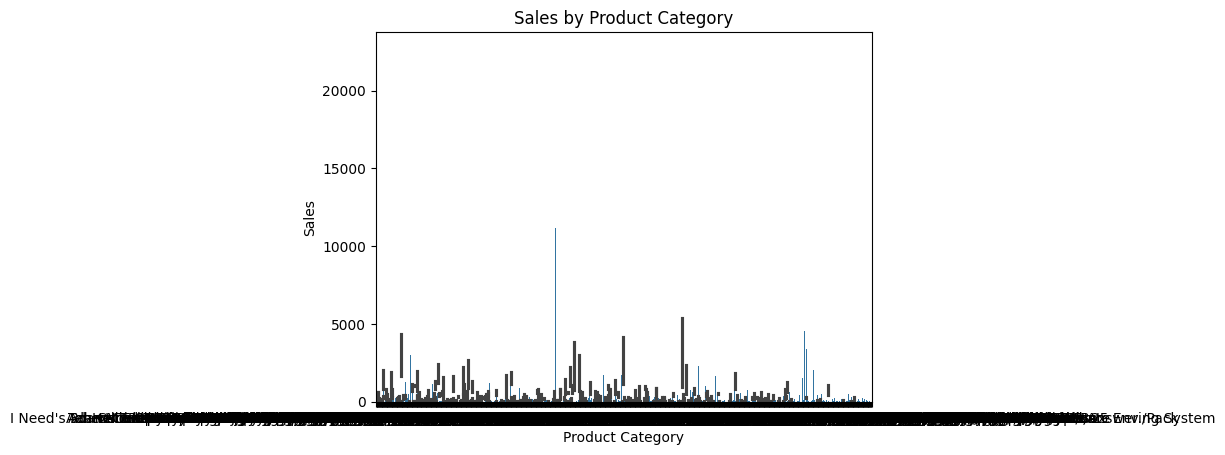

In [64]:
# Categorical plot - Bar plot
sns.barplot(x='Product Name', y='Sales', data=df)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

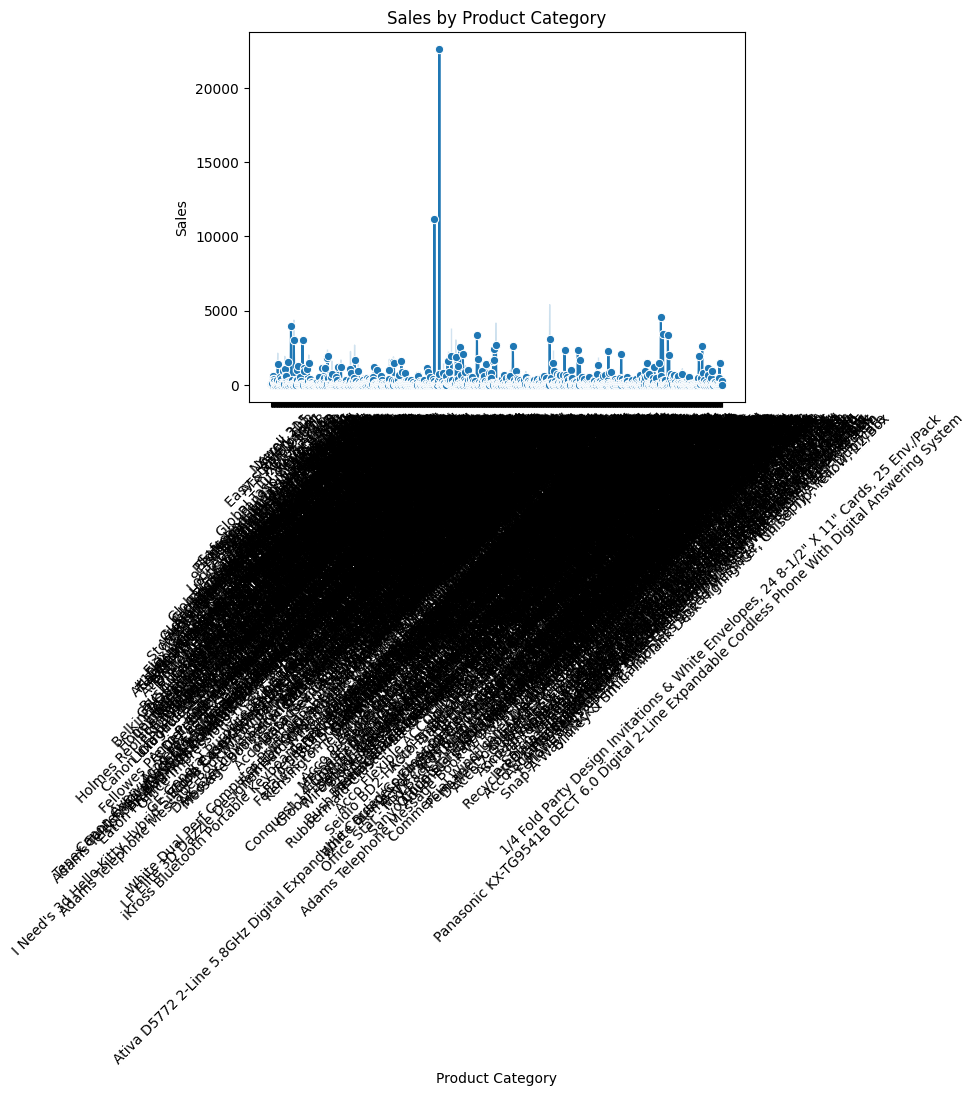

In [65]:
# Categorical plot - Line plot
sns.lineplot(x='Product Name', y='Sales', data=df, sort=False, marker='o')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-66-5ee0a37e88db>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['Product Name', 'Region']).sum().unstack()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


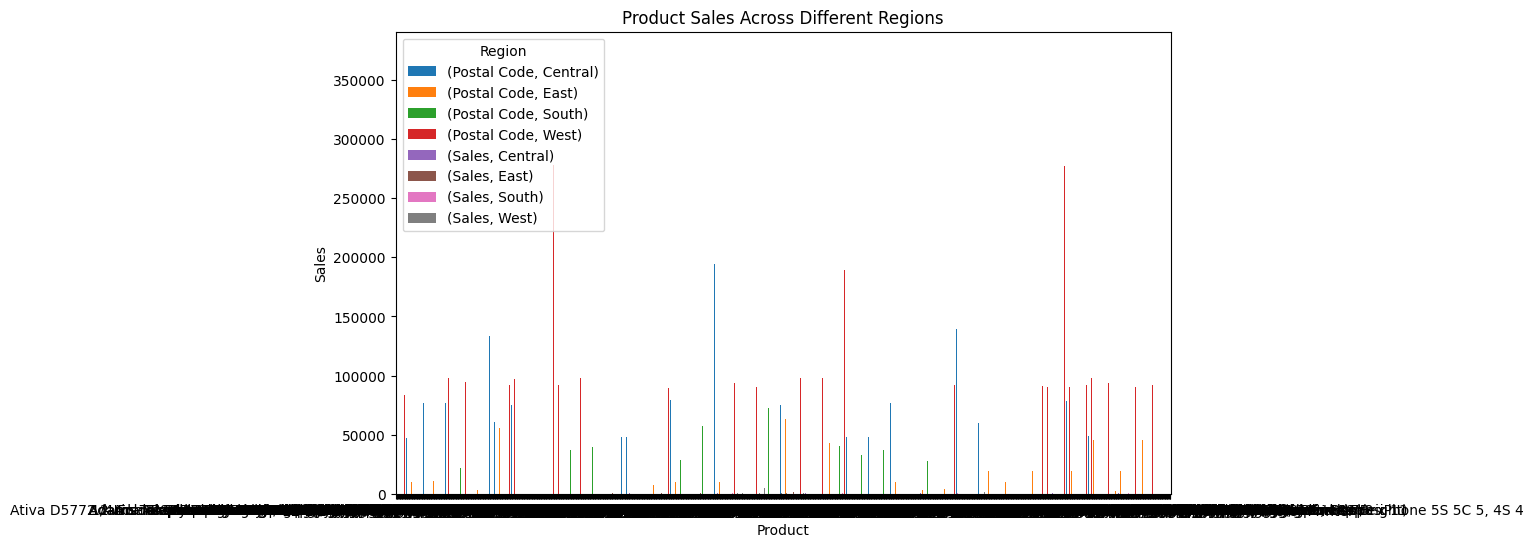

In [66]:
# Grouping data by Product and Region
grouped_data = df.groupby(['Product Name', 'Region']).sum().unstack()

# Plotting grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Product Sales Across Different Regions')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.legend(title='Region')
plt.show()